In [2]:
# import necessary libraries for a computer vision problem
import torch
from torch import nn 

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [3]:
# lets get a dataset to work on an example computer vision problem
# we can use MNIST dataset which contains thousands of handwritten digits
# but instead, lets work on FashionMNIST dataset, so lets download it

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # get the training data
    download=True,
    transform=ToTensor() #images are in PIL format, it transforms them to pytorch tensors
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape
# [color channel, height, width]


torch.Size([1, 28, 28])

In [6]:
# lets see how many samples we have
print(f"len(train_data.data) : {len(train_data.data)}")
print(f"len(test_data.data): {len(test_data.data)}")
print()
# what are the classes?
class_names = train_data.classes
print(class_names)

len(train_data.data) : 60000
len(test_data.data): 10000

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, '9')

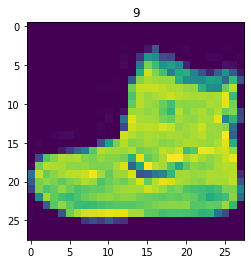

In [7]:
# lets visualize one of these datas
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

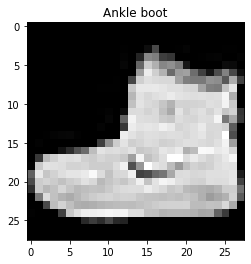

In [8]:
plt.imshow(image.squeeze(dim=0), cmap="gray")
plt.title(class_names[label])

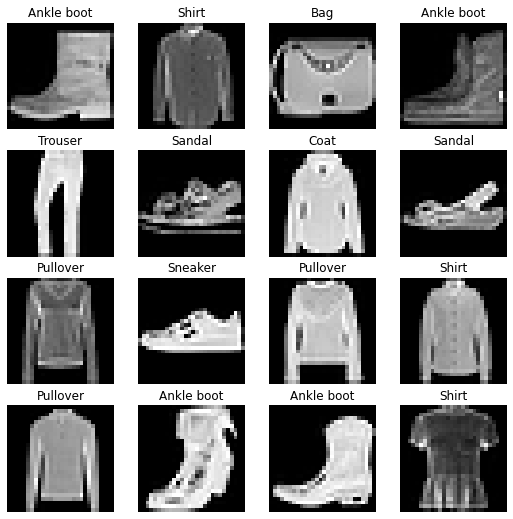

In [9]:
# let's see a few more images from this dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows * cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")
    
    


In [10]:
# Now that we have a dataset, we need to create a dataloader
# it turns a large dataset into a sequence of smaller chunkes(batches) of images and labels

from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# lets build a baseline model now with only 2 linear layers
# we should start with a flatten model to change the data into simple vectors
flatten_model = nn.Flatten()

x = train_feature_batch
